In [3]:
import pandas as pd


funks = pd.DataFrame(columns = ['name', 'text', 'artist', 'style'])
funks1 = pd.read_csv('funks_cariocas.csv')
funks2 = pd.read_csv('funks_paulistas.csv')


funks = funks.append(funks1)

/home/lubianat/.local/lib/python3.6/site-packages/pandas/core/frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [10]:
funks = pd.read_csv('funks_total.csv')


funks['text'] = [sub.replace('\n', ' ') for sub in funks['text']] 

funks['text'] = [sub.lower() for sub in funks['text']] 

funks['text'] = [sub.replace('[^\w\s]','') for sub in funks['text']] 
funks['text'] = [sub.replace('.', '') for sub in funks['text']] 
funks['text'] = [sub.replace(',','') for sub in funks['text']] 
funks['text'] = [sub.replace('pra','para') for sub in funks['text']] 

In [11]:
funks['word_count'] = funks['text'].apply(lambda x: len(str(x).split(" ")))
funks[['text','word_count']].head()

,text,word_count
0,criminoso moleque mulherengo maquinado bem tra...,135
1,"coração tá gelado a maldade na mente vários ""f...",257
2,vidro fumê rolando vários beck som no último v...,134
3,ela tava carente duas palavras entrei na mente...,140
4,dia de semana é tenso para tu vim com essas be...,178


In [12]:
import nltk as nltk
def remove_stopwords(text):
    stopword_list = nltk.corpus.stopwords.words('portuguese')
    tokens = nltk.word_tokenize(text)    
    tokens = [token.strip() for token in tokens]    
    return(' '.join([token for token in tokens if token not in stopword_list]))


funks['text'] = [remove_stopwords(sub) for sub in funks['text']] 

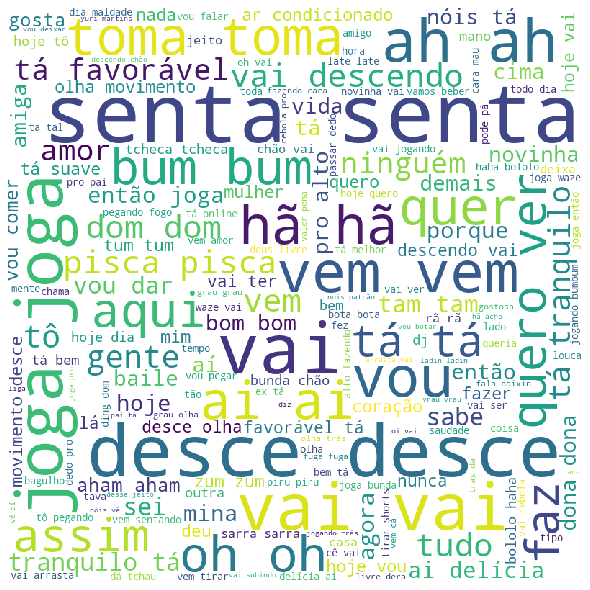

In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt 

funk_full_string = ' '.join(funks['text'])
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(funk_full_string)

# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

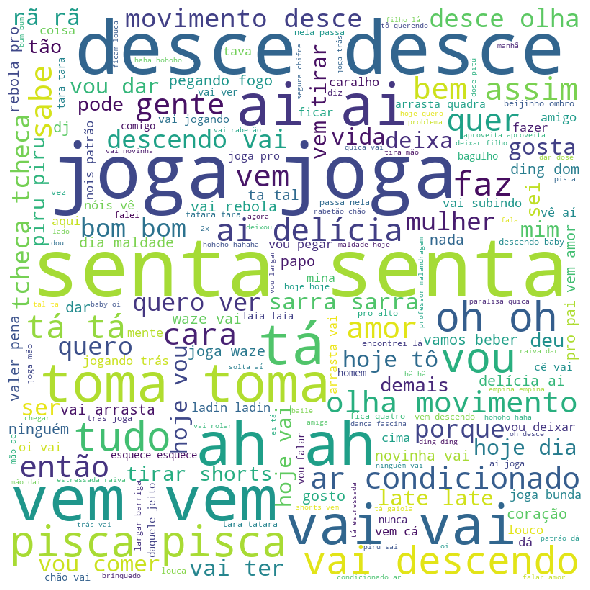

In [18]:

funk_carioca = funks[funks['style'] == 'funk_carioca']

funk_full_string = ' '.join(funk_carioca['text'])

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(funk_full_string)

# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

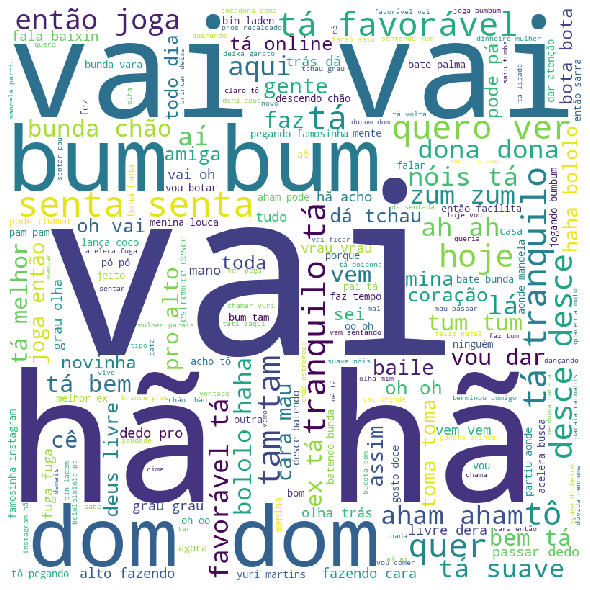

In [19]:
funk_paulista = funks[funks['style'] == 'funk_paulista']

funk_full_string = ' '.join(funk_paulista['text'])

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(funk_full_string)

# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 